In [1]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
!tar -xvzf cifar-10-python.tar.gz

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [3]:
train_files = sorted(["cifar-10-batches-py/"+file for file in os.listdir("cifar-10-batches-py") if file.startswith("data_batch_")])
test_file = "cifar-10-batches-py/test_batch"
train_files

['cifar-10-batches-py/data_batch_1',
 'cifar-10-batches-py/data_batch_2',
 'cifar-10-batches-py/data_batch_3',
 'cifar-10-batches-py/data_batch_4',
 'cifar-10-batches-py/data_batch_5']

In [4]:
train = np.array([])
for file in tqdm(train_files):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
        data = dict[b'data']
        labels = np.array(dict[b'labels']).reshape(-1, 1)
        del dict
    put = np.append(labels, data, axis=1)
    if not len(train):
        train = put
    else:
        train = np.append(train, put, axis=0)
print(train.shape)
train = pd.DataFrame(train)
train.to_csv("train.csv", index=False, header=False)
del train
del data
del labels

100%|██████████| 5/5 [00:00<00:00,  6.68it/s]


(50000, 3073)


In [5]:
with open(test_file, 'rb') as fo:
    dict = pickle.load(fo, encoding='bytes')
    data = dict[b'data']
    labels = np.array(dict[b'labels']).reshape(-1, 1)
    del dict

test = pd.DataFrame(np.append(labels, data, axis=1))
test.to_csv("test.csv", index=False, header=False)
del test
del data
del labels

b'broodmare_s_001463.png'


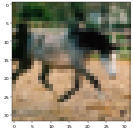

In [6]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

a = unpickle(train_files[0])
i = 52  # which image you want to see
print(a[b"filenames"][i])
image = a[b"data"][i].reshape(3, 32, 32).transpose(1, 2, 0)
image.shape
# reduce the dpi
plt.figure(dpi=32)
plt.imshow(image)

In [7]:
with open("cifar-10-batches-py/batches.meta", 'rb') as fo:
    dict = pickle.load(fo, encoding='bytes')
dict

{b'num_cases_per_batch': 10000,
 b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_vis': 3072}

In [8]:
# !mv cifar-10-batches-py/readme.html readme.html
# !mv cifar-10-batches-py/batches.meta batches.meta
!rm -rf cifar-10-batches-py